In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D

In [ ]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

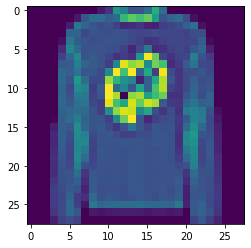

In [ ]:
plt.imshow(X_train[123])

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
              optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3464 - accuracy: 0.7407 - val_loss: 0.5604 - val_accuracy: 0.8093
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5217 - accuracy: 0.8205 - val_loss: 0.5204 - val_accuracy: 0.8208
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4637 - accuracy: 0.8365 - val_loss: 0.5442 - val_accuracy: 0.8102
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4317 - accuracy: 0.8469 - val_loss: 0.4457 - val_accuracy: 0.8442
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4026 - accuracy: 0.8582 - val_loss: 0.4562 - val_accuracy: 0.8323
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3862 - accuracy: 0.8630 - val_loss: 0.4251 - val_accuracy: 0.8500
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3655 - accuracy: 0.8701 - val_loss: 0.4571 - val_accuracy

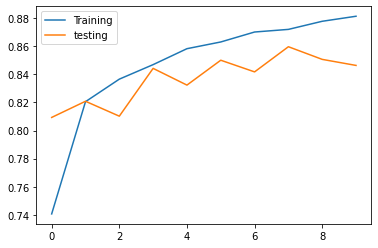

In [ ]:
plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='testing')
plt.legend()
plt.show()

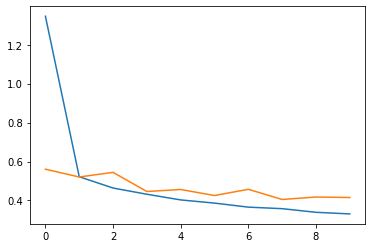

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=10, kernel_size=(3,3),activation='relu', input_shape=(28,28,1))) #(-1,28,28,1) 1 for channel, gray=1,color=3
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=15, kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 15)        1365      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 375)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc']
                  )

In [ ]:
cnn_history=cnn_model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.6453 - acc: 0.8008 - val_loss: 0.4392 - val_acc: 0.8366
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3837 - acc: 0.8591 - val_loss: 0.3799 - val_acc: 0.8624
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3358 - acc: 0.8758 - val_loss: 0.3485 - val_acc: 0.8711
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3042 - acc: 0.8877 - val_loss: 0.3368 - val_acc: 0.8716
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2834 - acc: 0.8935 - val_loss: 0.3535 - val_acc: 0.8705
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2656 - acc: 0.8998 - val_loss: 0.3376 - val_acc: 0.8801
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2541 - acc: 0.9033 - val_loss: 0.3509 - val_acc: 0.8761
Epoch 8/10
1875/1875 [==========================

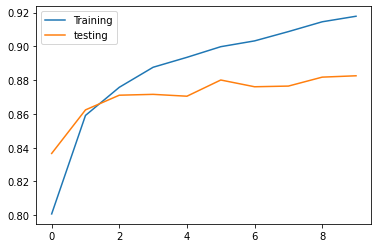

In [ ]:
plt.plot(cnn_history.history['acc'],label='Training')
plt.plot(cnn_history.history['val_acc'],label='testing')
plt.legend()
plt.show()

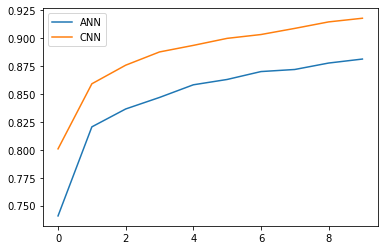

In [ ]:
plt.plot(history.history['accuracy'],label='ANN')
plt.plot(cnn_history.history['acc'],label='CNN')
plt.legend()
plt.show()